##### Show training graph

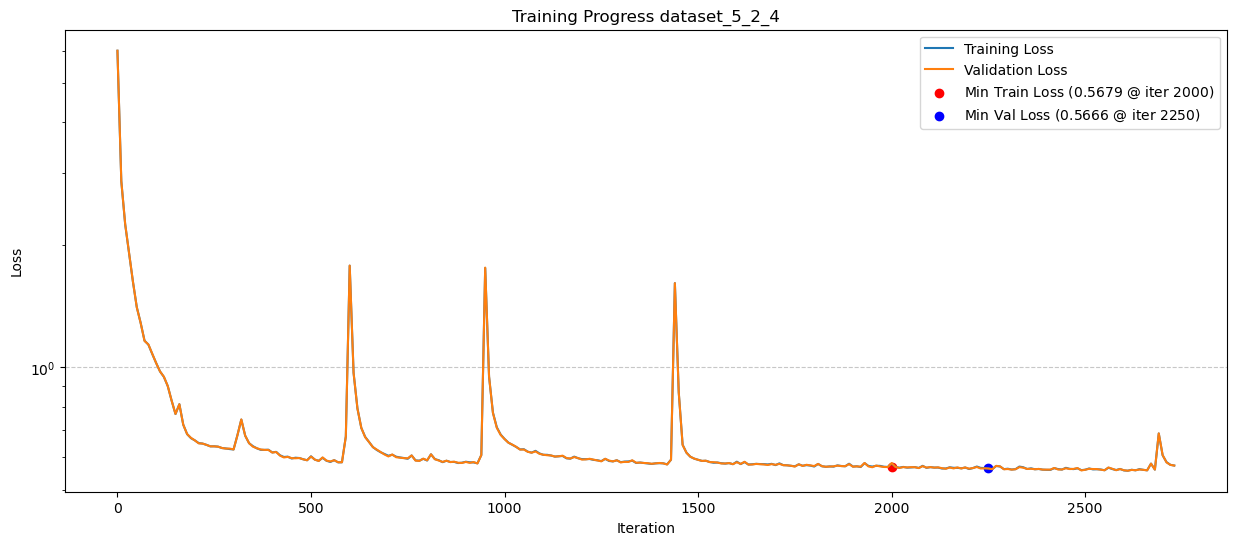

In [50]:
import matplotlib.pyplot as plt
import json
import os
import pUtil
import glob
import numpy as np

train_model = 'dataset_5_2_4'
train_model_dir = pUtil.get_training_dir(train_model)
training_log_files = glob.glob(os.path.join(train_model_dir, "*.jsonl"))

train_data_dict = {}
# Since we only test and save checkpoint every eval_interval, we need to keep track of checkpoint data separately for saved train_loss and val_loss
checkpoint_data_dict = {}
for file in training_log_files:
    with open(file, 'r') as data_file:
        for line in data_file:
            jdata = json.loads(line)
            if jdata['message'] == "Training progress" and 'iter' in jdata:
                train_data_dict[jdata['iter']] = (jdata['train_loss'], jdata['val_loss'])
            elif jdata['message'] == "Training progress: checking checkpoint conditions":
                checkpoint_data_dict[jdata['step']] = (jdata['train_loss'], jdata['val_loss'])

sorted_iterations = sorted(train_data_dict.keys())
train_loss = [train_data_dict[i][0] for i in sorted_iterations]
val_loss = [train_data_dict[i][1] for i in sorted_iterations]

saved_sorted_iterations = sorted(checkpoint_data_dict.keys())
saved_train_loss = [checkpoint_data_dict[i][0] for i in saved_sorted_iterations]
saved_val_loss = [checkpoint_data_dict[i][1] for i in saved_sorted_iterations]

min_saved_train_loss = min(saved_train_loss)
min_saved_val_loss = min(saved_val_loss)
min_train_iter = saved_sorted_iterations[saved_train_loss.index(min_saved_train_loss)]
min_val_iter = saved_sorted_iterations[saved_val_loss.index(min_saved_val_loss)]

plt.figure(figsize=(15, 6))
plt.yscale('log', base=10)
# plt.ylim(0.5, 2)
plt.plot(sorted_iterations, train_loss, label='Training Loss')
plt.plot(sorted_iterations, val_loss, label='Validation Loss')
plt.scatter(min_train_iter, min_saved_train_loss, color='red', marker='o', label=f'Min Train Loss (${min_saved_train_loss:.4f}$ @ iter {min_train_iter})')
plt.scatter(min_val_iter, min_saved_val_loss, color='blue', marker='o', label=f'Min Val Loss (${min_saved_val_loss:.4f}$ @ iter {min_val_iter})')
plt.title(f'Training Progress {os.path.basename(train_model)}')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### Show distributions

In [ ]:
from IPython.display import Image, display
import os
import pUtil

output_dir_name = 'dataset_2_2_1'
latest_folder = pUtil.get_latest_sampling_dir(output_dir_name)
display(Image(filename=os.path.join(latest_folder, 'histogram_e.png')))
display(Image(filename=os.path.join(latest_folder, 'histogram_num_particles.png')))
display(Image(filename=os.path.join(latest_folder, 'histogram_px.png')))
display(Image(filename=os.path.join(latest_folder, 'histogram_py.png')))
display(Image(filename=os.path.join(latest_folder, 'histogram_pz.png')))